### Download Flowers dataset

In [1]:
# #You can download the data manually as well instead of using 'wget'
# !wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

In [2]:
# !tar -xf flower_photos.tgz

In [1]:
!ls -l

total 2733248
-rw-rw-r--@  1 vidyadharbendre  staff      33661 Mar 23 12:45 1a. Classification_MNIST_CNN_Keras.ipynb
-rw-r--r--@  1 vidyadharbendre  staff      80103 Mar 23 13:07 1b. Classification_MNIST_CNN_Keras_Functional.ipynb
-rw-------@  1 vidyadharbendre  staff      60838 Mar 27 20:25 1c. Fraud Detection_NN-Notebook.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    1269188 Mar 22 21:07 2a. Visualize an Image.ipynb
-rw-------@  1 vidyadharbendre  staff      54372 Mar 23 11:07 2b. Image_Classification_CNN.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff      39149 Mar 23 10:15 2c. Image Classification - Flowers.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    3803839 Mar 23 11:26 3a. Image Augmentation.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff     798735 Mar 27 19:44 3b. Image Classification - Flowers with Augmentation.ipynb
-rw-------@  1 vidyadharbendre  staff     788645 Mar 27 19:38 3c. Image Classification - VGG.ipynb
-rw-------@  1 vidyadharbendre  staff      30688 Mar 27 19:42 4a. C

In [2]:
#Read the dataset
import tarfile
dataset = tarfile.open('flower_photos.tgz')

In [3]:
#We will build a pandas dataset
import pandas as pd
df = pd.DataFrame(columns=['class','image_file'])

In [4]:
#Run through tarfile members 
for name in dataset.getnames():
    
    tar_mem = dataset.getmember(name)
    
    #Check if it is a file
    if(tar_mem.isfile() and name.endswith('.jpg')):
        #Build directory and class info
        im_dir = name[0:name.rfind('/')]
        im_class = im_dir[im_dir.rfind('/')+1:]
        #Add record to the dataframe
        df.loc[df.shape[0]] = [im_class, name]

In [5]:
!ls -l flower_photos

total 1248
-rw-r-----@   1 vidyadharbendre  staff  418049 Feb  9  2016 LICENSE.txt
drwx------@ 635 vidyadharbendre  staff   20320 Feb 11  2016 daisy
drwx------@ 900 vidyadharbendre  staff   28800 Feb 11  2016 dandelion
drwx------@ 643 vidyadharbendre  staff   20576 Feb 11  2016 roses
drwx------@ 701 vidyadharbendre  staff   22432 Feb 11  2016 sunflowers
-rw-r--r--@   1 vidyadharbendre  staff   42269 Apr 10 09:45 test.csv
-rw-r--r--@   1 vidyadharbendre  staff  169533 Apr 10 09:45 train.csv
drwx------@ 801 vidyadharbendre  staff   25632 Feb 11  2016 tulips


In [6]:
df.sample(n=10)

,class,image_file
3455,dandelion,flower_photos/dandelion/61242541_a04395e6bc.jpg
3266,dandelion,flower_photos/dandelion/2294126841_e478564e77_...
711,sunflowers,flower_photos/sunflowers/4933229479_c1708bd503...
799,sunflowers,flower_photos/sunflowers/12471290635_1f9e3aae1...
3005,dandelion,flower_photos/dandelion/19617643201_9922eec796...
2186,daisy,flower_photos/daisy/16025261368_911703a536_n.jpg
858,sunflowers,flower_photos/sunflowers/6125761554_4e72819ce4...
841,sunflowers,flower_photos/sunflowers/8543642705_b841b0e5f6...
2419,daisy,flower_photos/daisy/10437929963_bc13eebe0c.jpg
2072,tulips,flower_photos/tulips/13471563274_471fc1db33_m.jpg


Create Training & Test Dataset

In [7]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
train_df.to_csv('flower_photos/train.csv',index=False)
test_df.to_csv('flower_photos/test.csv', index=False)

### Read training and test data

In [9]:
#Read training and test Dataframe
train_df = pd.read_csv('flower_photos/train.csv')
test_df = pd.read_csv('flower_photos/test.csv')

In [10]:
train_df.shape

(2936, 2)

In [11]:
test_df.shape

(734, 2)

In [12]:
#Check contents
train_df.sample(n=5)

,class,image_file
2075,roses,flower_photos/roses/9355706808_a9a723a8e8_n.jpg
739,tulips,flower_photos/tulips/8562853756_73778dac25_n.jpg
2393,dandelion,flower_photos/dandelion/19617501581_606be5f716...
1824,dandelion,flower_photos/dandelion/451965300_619b781dc9_m...
1645,roses,flower_photos/roses/18599603859_f2ec616ddf_n.jpg


In [14]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)

Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


### Build Batch generator (using ImageDataGenerator)

In [15]:
import tensorflow as tf
import numpy as np

In [16]:
#Define some parameters
img_size = 224
img_depth = 3

Function to normalize image according to Model being used

In [17]:
def normalize_data(img):
    
    #Normalize for ResNet50
    return tf.keras.applications.resnet50.preprocess_input(img)

Defime ImageDataGenerator for both Training and Test Separately

In [18]:
#Define Training Data Generator with augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                preprocessing_function=normalize_data) #Normalize the data accordingly

#Define Test Data Generator with NO augmentations
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_data) #Normalize the data accordingly

Create Data Generators objects for Training and Test

In [19]:
train_df.head()

,class,image_file
0,tulips,flower_photos/tulips/3502685880_f026400dce_n.jpg
1,daisy,flower_photos/daisy/16025261368_911703a536_n.jpg
2,sunflowers,flower_photos/sunflowers/5970869550_d7d9fabebd...
3,dandelion,flower_photos/dandelion/8223949_2928d3f6f6_n.jpg
4,roses,flower_photos/roses/15277801151_5ed88f40f0_n.jpg


In [20]:
#Training (from dataframe)
train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    x_col='image_file', #File path for image
                                                    y_col='class',           #Class for the image
                                                    target_size=(img_size, img_size), #Image resize dimensions
                                                    batch_size=64)

Found 2936 validated image filenames belonging to 5 classes.


In [21]:
#Test (from dataframe)
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  x_col='image_file', #File path for image
                                                  y_col='class',           #Class for the image
                                                  target_size=(img_size, img_size), #Image resize dimensions
                                                  batch_size=64)

Found 734 validated image filenames belonging to 5 classes.


ImageDataGenerator has lot of useful features. Learn more about ImageDataGenerator at https://keras.io/preprocessing/image/

In [22]:
x, y =  next(train_generator)

In [23]:
#x[0]

### Load pre-trained model

In [24]:
tf.keras.backend.clear_session()
model = tf.keras.applications.ResNet50(include_top=False, 
                                       weights='imagenet', 
                                       input_shape=(img_size, img_size, 3))

Metal device set to: Apple M1 Max


2024-04-16 19:37:45.636111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-16 19:37:45.636452: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [27]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

Freeze the layers in Pre-trained model

In [28]:
#model.layers

In [29]:
len(model.layers)

175

In [30]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [31]:
#Check if layers frozen
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Add FC layer for new classes

In [32]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [33]:
#get Output layer of Pre0trained model
x1 = model.output

#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

In [34]:
#Output shape of Global Average Pooling
x2

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'global_average_pooling2d')>

In [35]:
#Add output layer
prediction = tf.keras.layers.Dense(len(class_names),activation='softmax')(x2)

In [36]:
prediction

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense')>

### Building final model for Classification

In [37]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [38]:
#Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
#How does our overall model looks
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

### Train the model

In [40]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_resnet.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [41]:
final_model.fit(train_generator,
                epochs=5,
                steps_per_epoch= 2936//64,
                validation_data=test_generator,
                validation_steps = 734//64, 
                callbacks=[model_checkpoint])

Epoch 1/5


2024-04-16 19:41:42.610149: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-16 19:41:43.368751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - ETA: 0s - loss: 0.7795 - accuracy: 0.7138

2024-04-16 19:42:02.444682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.84943, saving model to flowers_resnet.h5
45/45 [==============================] - 22s 411ms/step - loss: 0.7795 - accuracy: 0.7138 - val_loss: 0.4141 - val_accuracy: 0.8494
Epoch 2/5
45/45 [==============================] - ETA: 0s - loss: 0.3680 - accuracy: 0.8726
Epoch 2: val_accuracy improved from 0.84943 to 0.87784, saving model to flowers_resnet.h5
45/45 [==============================] - 18s 394ms/step - loss: 0.3680 - accuracy: 0.8726 - val_loss: 0.3289 - val_accuracy: 0.8778
Epoch 3/5
45/45 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.9011
Epoch 3: val_accuracy improved from 0.87784 to 0.90199, saving model to flowers_resnet.h5
45/45 [==============================] - 18s 393ms/step - loss: 0.2959 - accuracy: 0.9011 - val_loss: 0.2866 - val_accuracy: 0.9020
Epoch 4/5
45/45 [==============================] - ETA: 0s - loss: 0.2728 - accuracy: 0.9076
Epoch 4: val_accuracy did not improve from 0.90199
45/45 

### Unfreeze some of Trained Layers in ResNet

In [42]:
print(len(model.layers))

175


Let's unfreeze some layers at the end (which have high end features more specific to ImageNet)

In [43]:
#Unfreezing all layers after layer#
for layer in model.layers[170:]:
    layer.trainable = True 

In [44]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [45]:
#We will need to recompile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [46]:
#Lets train for 10 steps
final_model.fit(train_generator, 
                epochs=10,
                initial_epoch=5,
                steps_per_epoch= 2936//64,
                validation_data=test_generator,
                validation_steps = 734//64, 
                callbacks=[model_checkpoint])

Epoch 6/10


2024-04-16 19:45:13.944144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8841

2024-04-16 19:45:32.797489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 6: val_accuracy did not improve from 0.90341
45/45 [==============================] - 22s 422ms/step - loss: 0.3479 - accuracy: 0.8841 - val_loss: 0.4127 - val_accuracy: 0.8636
Epoch 7/10
45/45 [==============================] - ETA: 0s - loss: 0.1619 - accuracy: 0.9419
Epoch 7: val_accuracy improved from 0.90341 to 0.90625, saving model to flowers_resnet.h5
45/45 [==============================] - 18s 399ms/step - loss: 0.1619 - accuracy: 0.9419 - val_loss: 0.3037 - val_accuracy: 0.9062
Epoch 8/10
45/45 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.9669
Epoch 8: val_accuracy did not improve from 0.90625
45/45 [==============================] - 18s 392ms/step - loss: 0.1023 - accuracy: 0.9669 - val_loss: 0.2912 - val_accuracy: 0.9020
Epoch 9/10
45/45 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9788
Epoch 9: val_accuracy improved from 0.90625 to 0.91619, saving model to flowers_resnet.h5
45/45 [==============================] 

In [47]:
#Lets train for 10 steps
final_model.fit(train_generator, 
                epochs=15,
                initial_epoch=10,
                steps_per_epoch= 2936//64,
                validation_data=test_generator,
                validation_steps = 734//64, 
                callbacks=[model_checkpoint])

Epoch 11/15
45/45 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9826
Epoch 11: val_accuracy did not improve from 0.92188
45/45 [==============================] - 17s 386ms/step - loss: 0.0525 - accuracy: 0.9826 - val_loss: 0.2431 - val_accuracy: 0.9219
Epoch 12/15
45/45 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9885
Epoch 12: val_accuracy improved from 0.92188 to 0.92330, saving model to flowers_resnet.h5
45/45 [==============================] - 17s 383ms/step - loss: 0.0435 - accuracy: 0.9885 - val_loss: 0.2426 - val_accuracy: 0.9233
Epoch 13/15
45/45 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9909
Epoch 13: val_accuracy did not improve from 0.92330
45/45 [==============================] - 17s 382ms/step - loss: 0.0381 - accuracy: 0.9909 - val_loss: 0.3606 - val_accuracy: 0.9176
Epoch 14/15
45/45 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9854
Epoch 14: val_accuracy did no

In [48]:
#Unfreezing all layers after layer#
for layer in model.layers[140:]:
    layer.trainable = True 

In [49]:
adam_opt = tf.keras.optimizers.Adam(lr=0.00001)
final_model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [50]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [51]:
#Lets train for 10 steps
final_model.fit(train_generator, 
                epochs=20,
                initial_epoch=15,
                steps_per_epoch= 2936//64,
                validation_data=test_generator,
                validation_steps = 734//64, 
                callbacks=[model_checkpoint])

Epoch 16/20


2024-04-16 19:50:11.720601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.9537

2024-04-16 19:50:31.444596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 16: val_accuracy did not improve from 0.92330
45/45 [==============================] - 23s 441ms/step - loss: 0.1303 - accuracy: 0.9537 - val_loss: 0.2760 - val_accuracy: 0.9162
Epoch 17/20
45/45 [==============================] - ETA: 0s - loss: 0.0653 - accuracy: 0.9795
Epoch 17: val_accuracy improved from 0.92330 to 0.92472, saving model to flowers_resnet.h5
45/45 [==============================] - 18s 404ms/step - loss: 0.0653 - accuracy: 0.9795 - val_loss: 0.2586 - val_accuracy: 0.9247
Epoch 18/20
45/45 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9847
Epoch 18: val_accuracy improved from 0.92472 to 0.93182, saving model to flowers_resnet.h5
45/45 [==============================] - 19s 415ms/step - loss: 0.0523 - accuracy: 0.9847 - val_loss: 0.2494 - val_accuracy: 0.9318
Epoch 19/20
45/45 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9906
Epoch 19: val_accuracy improved from 0.93182 to 0.93466, saving model to flowers_res

In [52]:
#Lets train for 10 steps
final_model.fit(train_generator, 
                epochs=30,
                initial_epoch=20,
                steps_per_epoch= 2936//64,
                validation_data=test_generator,
                validation_steps = 734//64, 
                callbacks=[model_checkpoint])

Epoch 21/30
45/45 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9948
Epoch 21: val_accuracy improved from 0.93892 to 0.94034, saving model to flowers_resnet.h5
45/45 [==============================] - 18s 404ms/step - loss: 0.0268 - accuracy: 0.9948 - val_loss: 0.2329 - val_accuracy: 0.9403
Epoch 22/30
45/45 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9948
Epoch 22: val_accuracy improved from 0.94034 to 0.94176, saving model to flowers_resnet.h5
45/45 [==============================] - 18s 390ms/step - loss: 0.0264 - accuracy: 0.9948 - val_loss: 0.2097 - val_accuracy: 0.9418
Epoch 23/30
45/45 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9965
Epoch 23: val_accuracy did not improve from 0.94176
45/45 [==============================] - 17s 383ms/step - loss: 0.0190 - accuracy: 0.9965 - val_loss: 0.2339 - val_accuracy: 0.9375
Epoch 24/30
45/45 [==============================] - ETA: 0s - loss: 0.0227 - accurac

In [53]:
final_model.save('flowers.h5')

In [54]:
!ls -l

total 3270584
-rw-rw-r--@  1 vidyadharbendre  staff      33661 Mar 23 12:45 1a. Classification_MNIST_CNN_Keras.ipynb
-rw-r--r--@  1 vidyadharbendre  staff      80103 Mar 23 13:07 1b. Classification_MNIST_CNN_Keras_Functional.ipynb
-rw-------@  1 vidyadharbendre  staff      60838 Mar 27 20:25 1c. Fraud Detection_NN-Notebook.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    1269188 Mar 22 21:07 2a. Visualize an Image.ipynb
-rw-------@  1 vidyadharbendre  staff      54372 Mar 23 11:07 2b. Image_Classification_CNN.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff      39149 Mar 23 10:15 2c. Image Classification - Flowers.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    3803839 Mar 23 11:26 3a. Image Augmentation.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff     798735 Mar 27 19:44 3b. Image Classification - Flowers with Augmentation.ipynb
-rw-------@  1 vidyadharbendre  staff     788645 Mar 27 19:38 3c. Image Classification - VGG.ipynb
-rw-------@  1 vidyadharbendre  staff      30688 Mar 27 19:42 4a. C

#### Model Prediction

In [55]:
#!ls -l flower_photos/daisy

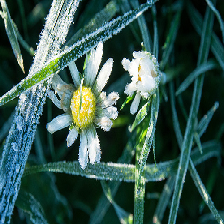

In [56]:
#Load an image
img = tf.keras.preprocessing.image.load_img('flower_photos/daisy/8127252886_96558c23d1.jpg', target_size=(img_size, img_size))
img

In [57]:
#Convert to numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

#Normalize array
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

#Make it a batch
img_array = tf.expand_dims(img_array, axis=0)

#Predict
preds = final_model.predict(img_array)

#Print prediction
preds

2024-04-16 19:57:56.335795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


array([[9.9704427e-01, 2.7306401e-03, 2.0383349e-04, 1.6670161e-05,
        4.5973020e-06]], dtype=float32)

In [58]:
#Class index with highest probability
tf.argmax(preds[0]).numpy()

0

In [59]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

#### Residual block

In [60]:
#Input to residual block
x = tf.keras.layers.Input(shape=(28,28,64,))

#First convolution layer
c1 = tf.keras.layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu')(x)

#Second convolution layer
c2 = tf.keras.layers.Conv2D(64,kernel_size=(3,3), padding='same')(c1)

#Add operation
a1 = tf.keras.layers.Add()([c2,x])
r1 = tf.keras.layers.ReLU()(a1)

In [61]:
x

<KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 'input_2')>

In [62]:
c1

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [63]:
c2

<KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 'conv2d_1')>

In [64]:
a1

<KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 'add')>

In [65]:
r1

<KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 're_lu')>

In [66]:
res_model = tf.keras.models.Model(x, r1)

In [67]:
res_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 64)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 32)   18464       ['input_2[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 add (Add)                      (None, 28, 28, 64)   0           ['conv2d_1[0][0]',         